# Анализ качества работы нейронной сети для распознавание моделей одежды в Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://www.asozykin.ru/courses/nnpython)".

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

C:\Users\sozyk\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Подготовка данных для обучения сети

**Загружаем набор данных**

In [2]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [3]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

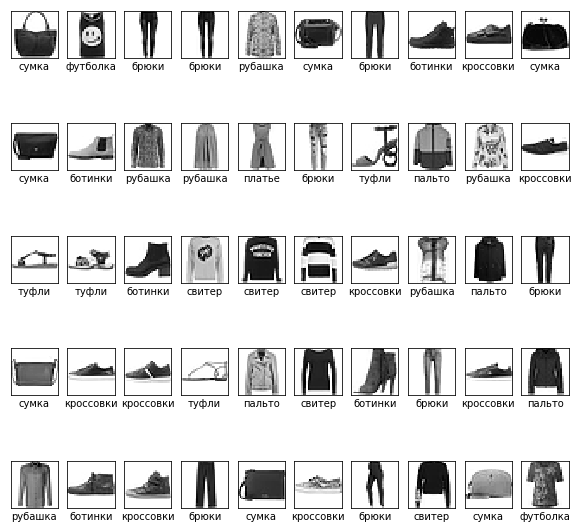

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [6]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 
x_test = x_test / 255 

**Работа с правильными ответами**

In [7]:
n = 0

In [8]:
print(y_train[n])

9


**Преобразуем метки в формат one hot encoding**

In [9]:
y_train = utils.to_categorical(y_train, 10)

In [10]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [11]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [12]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [14]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 4s 80us/step - loss: 1.2049 - acc: 0.6523 - val_loss: 0.8473 - val_acc: 0.7279
Epoch 2/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.7693 - acc: 0.7576 - val_loss: 0.7004 - val_acc: 0.7762
Epoch 3/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.6699 - acc: 0.7879 - val_loss: 0.6353 - val_acc: 0.7963
Epoch 4/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.6158 - acc: 0.8046 - val_loss: 0.5951 - val_acc: 0.8063
Epoch 5/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.5804 - acc: 0.8130 - val_loss: 0.5658 - val_acc: 0.8138
Epoch 6/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.5548 - acc: 0.8202 - val_loss: 0.5447 - val_acc: 0.8187
Epoch 7/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.5349 - acc: 0.8245 - val_loss: 0.5299 - 

48000/48000 [==============================] - 1s 30us/step - loss: 0.3564 - acc: 0.8773 - val_loss: 0.3811 - val_acc: 0.8658
Epoch 60/100
48000/48000 [==============================] - 1s 29us/step - loss: 0.3554 - acc: 0.8776 - val_loss: 0.3789 - val_acc: 0.8676
Epoch 61/100
48000/48000 [==============================] - 1s 29us/step - loss: 0.3543 - acc: 0.8783 - val_loss: 0.3825 - val_acc: 0.8676
Epoch 62/100
48000/48000 [==============================] - 1s 29us/step - loss: 0.3530 - acc: 0.8794 - val_loss: 0.3781 - val_acc: 0.8676
Epoch 63/100
48000/48000 [==============================] - 1s 29us/step - loss: 0.3522 - acc: 0.8786 - val_loss: 0.3762 - val_acc: 0.8682
Epoch 64/100
48000/48000 [==============================] - 1s 29us/step - loss: 0.3506 - acc: 0.8792 - val_loss: 0.3852 - val_acc: 0.8657
Epoch 65/100
48000/48000 [==============================] - 1s 29us/step - loss: 0.3497 - acc: 0.8797 - val_loss: 0.3765 - val_acc: 0.8675
Epoch 66/100
48000/48000 [==============

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [15]:
scores = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 0s 44us/step


In [16]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 86.52


## Используем сеть для распознавания предметов одежды

In [17]:
n_rec = 495

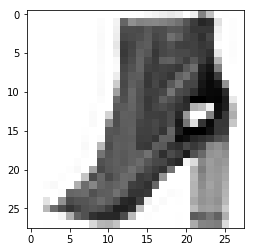

In [18]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [19]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [20]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [21]:
prediction

array([[3.8311031e-05, 2.7414723e-07, 8.1846883e-07, 6.4461449e-07,
        6.7051637e-08, 2.7675154e-02, 2.9293503e-06, 3.3591478e-04,
        7.5300236e-06, 9.7193831e-01]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [22]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 9
Название класса: ботинки


**Печатаем правильный ответ**

In [23]:
label = np.argmax(y_test[0])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 9
Название класса: ботинки


## Идеи по изменению архитектуры нейронной сети

1. Попробуйте использовать разное количество нейронов на входном слое: 400, 600, 800, 1200.
2. Добавьте в нейронную сеть скрытый слой с разным количеством нейронов: 200, 300, 400, 600, 800.
3. Добавьте несколько скрытых слоев в сеть с разным количеством нейронов в каждом слое.
3. Используйте разное количество эпох: 10, 15, 20, 25, 30.
4. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.
 

Подберить разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Убедитесь, что в вашей модели нет переобучения.